<a href="https://colab.research.google.com/github/eley2020/manning_liveproject/blob/master/HPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

--2020-05-28 01:19:30--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  15.3MB/s    in 15s     

2020-05-28 01:19:45 (11.6 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [2]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-05-28 01:19:56--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  15.2MB/s    in 7.3s    

2020-05-28 01:20:04 (8.36 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



array([3], dtype=uint8)

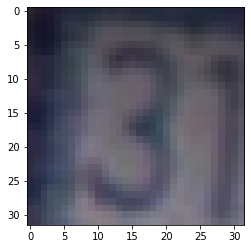

In [3]:
from scipy import io
import matplotlib.pyplot as plt
train = io.loadmat('train_32x32.mat')
test = io.loadmat('test_32x32.mat')
plt.imshow(train['X'][:,:,:,8])
train['y'][8]

In [0]:
import numpy as np
for i in range(train['y'].shape[0]):
  if train['y'][i] == np.array([10]):
    train['y'][i] = np.array([0])

In [0]:
for i in range(test['y'].shape[0]):
  if test['y'][i] == np.array([10]):
    test['y'][i] = np.array([0])

In [6]:
# This code downloads the coco dataset from Amazon S3 in parallel.
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess
files = ['val2017.zip', 'annotations_trainval2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", file_name])
    print("Finished unzipping", file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished downloading val2017.zip . Starting to unzip.
Finished unzipping annotations_trainval2017.zip
Finished unzipping val2017.zip
Done transferring all datasets
